## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
import random

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

In [2]:
# Combine the data into a single dataset
combined_mice_df = pd.merge(mouse_metadata_df, study_results_df, how= 'outer', on= "Mouse ID")

# Display the data table for preview
combined_mice_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
combined_mice_df = combined_mice_df.rename(columns={"Age_months": "Age Months"})
combined_mice_df.head()

,Mouse ID,Drug Regimen,Sex,Age Months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.
combined_mice_df["Mouse ID"].count()

1893

In [5]:
mouse_id = combined_mice_df["Mouse ID"].unique()
mouse_id

array(['k403', 's185', 'x401', 'm601', 'g791', 's508', 'f966', 'm546',
       'z578', 'j913', 'u364', 'n364', 'y793', 'r554', 'm957', 'c758',
       't565', 'a644', 'i177', 'j989', 'i738', 'a520', 'w914', 'r811',
       'g288', 'i334', 'q610', 'd251', 'l897', 'c458', 'b742', 'b128',
       'j246', 'a411', 'j119', 'w150', 'v923', 'g316', 's710', 'l509',
       'r944', 'e662', 'u196', 'q597', 'a444', 'i557', 'r921', 'w678',
       'y449', 'a203', 'a251', 'a262', 'a275', 'a366', 'a401', 'a457',
       'a492', 'a577', 'a685', 'a699', 'a788', 'a818', 'a897', 'a963',
       'b313', 'b447', 'b487', 'b559', 'b759', 'b879', 'c139', 'c264',
       'c282', 'c302', 'c326', 'c402', 'c559', 'c580', 'c757', 'c766',
       'c819', 'c832', 'c895', 'c927', 'd133', 'd164', 'd474', 'e213',
       'e227', 'e291', 'e476', 'e584', 'f129', 'f234', 'f278', 'f345',
       'f394', 'f436', 'f545', 'f932', 'f993', 'g107', 'g296', 'g497',
       'g558', 'g570', 'g867', 'g989', 'h246', 'h333', 'h428', 'h531',
      

In [6]:
combined_mice_df["Mouse ID"].drop_duplicates().count()

249

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice_df = combined_mice_df[combined_mice_df[["Mouse ID", "Timepoint"]].duplicated() ==True]
duplicate_mice_df

,Mouse ID,Drug Regimen,Sex,Age Months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
g989 = combined_mice_df.loc[combined_mice_df["Mouse ID"] =="g989", :]
g989


,Mouse ID,Drug Regimen,Sex,Age Months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
new_combined_mice_df = combined_mice_df.drop_duplicates(subset=["Mouse ID","Timepoint"], keep="first")
new_combined_mice_df

,Mouse ID,Drug Regimen,Sex,Age Months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [10]:
# Checking the number of mice in the clean DataFrame
new_combined_mice_df["Mouse ID"].count()

1888

In [11]:
new_mice_count = new_combined_mice_df["Mouse ID"].drop_duplicates().count()
new_mice_count

249

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

In [13]:
tumor_volume_df = new_combined_mice_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"]
avg_tumor_volume_df = tumor_volume_df.mean()
Average_tumor_volume = pd.DataFrame(avg_tumor_volume_df)
Average_tumor_volume

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,40.675741
Ceftamin,52.591172
Infubinol,52.884795
Ketapril,55.235638
Naftisol,54.331565
Placebo,54.033581
Propriva,52.393463
Ramicane,40.216745
Stelasyn,54.233149


In [14]:
tumor_volume_df = new_combined_mice_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"]
med_tumor_volume_df = tumor_volume_df.median()
Median_tumor_volume = pd.DataFrame(med_tumor_volume_df)
Median_tumor_volume

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,41.557809
Ceftamin,51.776157
Infubinol,51.820584
Ketapril,53.698743
Naftisol,52.509285
Placebo,52.288934
Propriva,50.909965
Ramicane,40.673236
Stelasyn,52.431737


In [15]:
tumor_volume_df = new_combined_mice_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"]
var_tumor_volume_df = tumor_volume_df.var()
variance_tumor_volume = pd.DataFrame(var_tumor_volume_df)
variance_tumor_volume

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,24.947764
Ceftamin,39.290177
Infubinol,43.128684
Ketapril,68.553577
Naftisol,66.173479
Placebo,61.168083
Propriva,43.138803
Ramicane,23.486704
Stelasyn,59.450562


In [16]:
tumor_volume_df = new_combined_mice_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"]
std_tumor_volume_df = tumor_volume_df.std()
stdeviation_tumor_volume = pd.DataFrame(std_tumor_volume_df)
stdeviation_tumor_volume

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,4.994774
Ceftamin,6.268188
Infubinol,6.567243
Ketapril,8.279709
Naftisol,8.134708
Placebo,7.821003
Propriva,6.568014
Ramicane,4.846308
Stelasyn,7.710419


In [17]:
tumor_volume_df = new_combined_mice_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"]
sem_tumor_volume_df = tumor_volume_df.sem()
stderror_tumor_volume = pd.DataFrame(sem_tumor_volume_df)
stderror_tumor_volume

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,0.329346
Ceftamin,0.469821
Infubinol,0.492236
Ketapril,0.603860
Naftisol,0.596466
Placebo,0.581331
Propriva,0.525862
Ramicane,0.320955
Stelasyn,0.573111


In [18]:
Drug_Regimen_Stats = pd.DataFrame({"Mean": avg_tumor_volume_df,
                                   "Median": med_tumor_volume_df,
                                   "Variance": var_tumor_volume_df,
                                   "Standard Deviation": std_tumor_volume_df,
                                   "SEM": sem_tumor_volume_df})
Drug_Regimen_Stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [19]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function
tumor_volume_df2 = new_combined_mice_df.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
tumor_volume_df2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

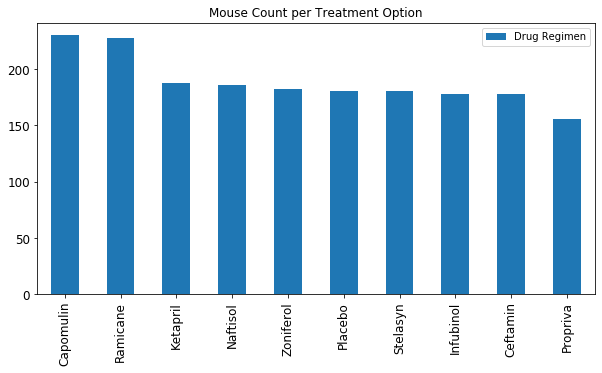

In [20]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mouse_count_per_drug = new_combined_mice_df["Drug Regimen"].value_counts()
mouse_count_per_drug.plot(kind= "bar",title ="Mouse Count per Treatment Option",
                                                 figsize=(10,5), legend=True, fontsize=12)
plt.show()

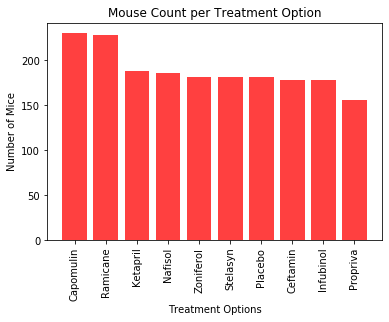

<Figure size 432x288 with 0 Axes>

In [21]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
drugs = ("Capomulin", "Ramicane", "Ketapril", "Nafisol", "Zoniferol", "Stelasyn", "Placebo", "Ceftamin", "Infubinol", "Propriva")
x_axis = np.arange(len(mouse_count_per_drug))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)
                   
plt.title("Mouse Count per Treatment Option")
plt.xlabel("Treatment Options")
plt.ylabel("Number of Mice")

plt.bar(x_axis, mouse_count_per_drug, color='r', alpha=0.75, align="center")
plt.xticks(tick_locations, drugs, rotation="vertical")
plt.show()
plt.tight_layout()

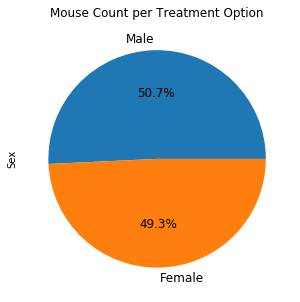

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count = new_combined_mice_df["Sex"].value_counts()
gender_count.plot(kind= "pie",title ="Mouse Count per Treatment Option", autopct="%1.1f%%",
                                                 figsize=(5,5), fontsize=12)
plt.show()

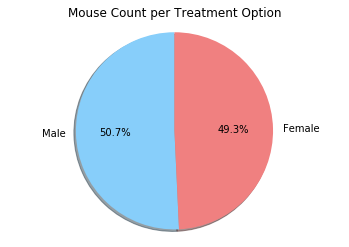

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = ["Male", "Female"]
colors = ["lightskyblue", "lightcoral"]
plt.title("Mouse Count per Treatment Option")
plt.pie(gender_count, labels=sex, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [24]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

In [25]:
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = new_combined_mice_df.groupby(["Mouse ID"])["Timepoint"].last()
last_tumor_vol = new_combined_mice_df.groupby(["Mouse ID"])["Tumor Volume (mm3)"].last()
last_chemo_drug = new_combined_mice_df.groupby(["Mouse ID"])["Drug Regimen"].last()
last_weight = new_combined_mice_df.groupby(["Mouse ID"])["Weight (g)"].last()

In [26]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_combined_mice_df = pd.merge(last_timepoint, last_tumor_vol, how= "left", on= ["Mouse ID"])
last_combined_mice_merge1 = pd.merge(last_combined_mice_df, last_chemo_drug, how= "left", on= ["Mouse ID"])
last_combined_mice_merge2= pd.merge(last_combined_mice_merge1, last_weight, how= "left", on= ["Mouse ID"])
last_combined_mice_merge2

,Timepoint,Tumor Volume (mm3),Drug Regimen,Weight (g)
Mouse ID,,,,
a203,45,67.973419,Infubinol,23
a251,45,65.525743,Infubinol,25
a262,45,70.717621,Placebo,29
a275,45,62.999356,Ceftamin,28
a366,30,63.440686,Stelasyn,29
...,...,...,...,...
z435,10,48.710661,Propriva,26
z578,45,30.638696,Ramicane,16
z581,45,62.754451,Infubinol,25


In [27]:
# Capomulin, Ramicane, Infubinol, and Ceftamin

In [28]:
# Put treatments into a list for for loop (and later for plot labels)
tx = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]
#Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []
for drug in tx:
    tumor_vol_list.append(last_combined_mice_merge2[last_combined_mice_merge2["Drug Regimen"] == drug]["Tumor Volume (mm3)"])
    print(tumor_vol_list)

[Mouse ID
b128    38.982878
b742    38.939633
f966    30.485985
g288    37.074024
g316    40.159220
i557    47.685963
i738    37.311846
j119    38.125164
j246    38.753265
l509    41.483008
l897    38.846876
m601    28.430964
m957    33.329098
r157    46.539206
r554    32.377357
r944    41.581521
s185    23.343598
s710    40.728578
t565    34.455298
u364    31.023923
v923    40.658124
w150    39.952347
w914    36.041047
x401    28.484033
y793    31.896238
Name: Tumor Volume (mm3), dtype: float64]
[Mouse ID
b128    38.982878
b742    38.939633
f966    30.485985
g288    37.074024
g316    40.159220
i557    47.685963
i738    37.311846
j119    38.125164
j246    38.753265
l509    41.483008
l897    38.846876
m601    28.430964
m957    33.329098
r157    46.539206
r554    32.377357
r944    41.581521
s185    23.343598
s710    40.728578
t565    34.455298
u364    31.023923
v923    40.658124
w150    39.952347
w914    36.041047
x401    28.484033
y793    31.896238
Name: Tumor Volume (mm3), dtype: float

In [29]:
Capomulin_df = last_combined_mice_merge2[last_combined_mice_merge2["Drug Regimen"] =="Capomulin"]["Tumor Volume (mm3)"]
Capomulin_df

Mouse ID
b128    38.982878
b742    38.939633
f966    30.485985
g288    37.074024
g316    40.159220
i557    47.685963
i738    37.311846
j119    38.125164
j246    38.753265
l509    41.483008
l897    38.846876
m601    28.430964
m957    33.329098
r157    46.539206
r554    32.377357
r944    41.581521
s185    23.343598
s710    40.728578
t565    34.455298
u364    31.023923
v923    40.658124
w150    39.952347
w914    36.041047
x401    28.484033
y793    31.896238
Name: Tumor Volume (mm3), dtype: float64

In [30]:
Ramicane_df = last_combined_mice_merge2.loc[last_combined_mice_merge2["Drug Regimen"] =="Ramicane"]["Tumor Volume (mm3)"]
Ramicane_df

Mouse ID
a411    38.407618
a444    43.047543
a520    38.810366
a644    32.978522
c458    38.342008
c758    33.397653
d251    37.311236
e662    40.659006
g791    29.128472
i177    33.562402
i334    36.374510
j913    31.560470
j989    36.134852
k403    22.050126
m546    30.564625
n364    31.095335
q597    45.220869
q610    36.561652
r811    37.225650
r921    43.419381
s508    30.276232
u196    40.667713
w678    43.166373
y449    44.183451
z578    30.638696
Name: Tumor Volume (mm3), dtype: float64

In [31]:
Infubinol_df = last_combined_mice_merge2.loc[last_combined_mice_merge2["Drug Regimen"] =="Infubinol"]["Tumor Volume (mm3)"]
Infubinol_df

Mouse ID
a203    67.973419
a251    65.525743
a577    57.031862
a685    66.083066
c139    72.226731
c326    36.321346
c895    60.969711
e476    62.435404
f345    60.918767
i386    67.289621
k483    66.196912
k804    62.117279
m756    47.010364
n671    60.165180
o809    55.629428
o813    45.699331
q132    54.656549
s121    55.650681
v339    46.250112
v719    54.048608
v766    51.542431
w193    50.005138
w584    58.268442
y163    67.685569
z581    62.754451
Name: Tumor Volume (mm3), dtype: float64

In [32]:
Ceftamin_df = last_combined_mice_merge2.loc[last_combined_mice_merge2["Drug Regimen"] =="Ceftamin"]["Tumor Volume (mm3)"]
Ceftamin_df

Mouse ID
a275    62.999356
b447    45.000000
b487    56.057749
b759    55.742829
f436    48.722078
h531    47.784682
j296    61.849023
k210    68.923185
l471    67.748662
l490    57.918381
l558    46.784535
l661    59.851956
l733    64.299830
o287    59.741901
p438    61.433892
q483    64.192341
t573    45.000000
u149    52.925348
u153    45.000000
w151    67.527482
x226    45.000000
x581    64.634949
x822    61.386660
y769    68.594745
y865    64.729837
Name: Tumor Volume (mm3), dtype: float64

In [33]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds

In [34]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = Capomulin_df.quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume (mm3) is: {lowerq}")
print(f"The upper quartile of Tumor Volume (mm3) is: {upperq}")
print(f"The interquartile range of Tumor Volume (mm3) is: {iqr}")
print(f"The the median of Tumor Volume (mm3)is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Tumor Volume (mm3) is: 32.37735684
The upper quartile of Tumor Volume (mm3) is: 40.1592203
The interquartile range of Tumor Volume (mm3) is: 7.781863460000004
The the median of Tumor Volume (mm3)is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [35]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = Ramicane_df.quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume (mm3) is: {lowerq}")
print(f"The upper quartile of Tumor Volume (mm3) is: {upperq}")
print(f"The interquartile range of Tumor Volume (mm3) is: {iqr}")
print(f"The the median of Tumor Volume (mm3)is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Tumor Volume (mm3) is: 31.56046955
The upper quartile of Tumor Volume (mm3) is: 40.65900627
The interquartile range of Tumor Volume (mm3) is: 9.098536719999998
The the median of Tumor Volume (mm3)is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [36]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = Infubinol_df.quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume (mm3) is: {lowerq}")
print(f"The upper quartile of Tumor Volume (mm3) is: {upperq}")
print(f"The interquartile range of Tumor Volume (mm3) is: {iqr}")
print(f"The the median of Tumor Volume (mm3)is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Tumor Volume (mm3) is: 54.04860769
The upper quartile of Tumor Volume (mm3) is: 65.52574285
The interquartile range of Tumor Volume (mm3) is: 11.477135160000003
The the median of Tumor Volume (mm3)is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [37]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = Ceftamin_df.quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume (mm3) is: {lowerq}")
print(f"The upper quartile of Tumor Volume (mm3) is: {upperq}")
print(f"The interquartile range of Tumor Volume (mm3) is: {iqr}")
print(f"The the median of Tumor Volume (mm3)is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Tumor Volume (mm3) is: 48.72207785
The upper quartile of Tumor Volume (mm3) is: 64.29983003
The interquartile range of Tumor Volume (mm3) is: 15.577752179999997
The the median of Tumor Volume (mm3)is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


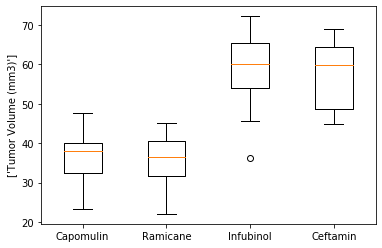

In [43]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax = plt.subplots()
ax.boxplot([Capomulin_df, Ramicane_df, Infubinol_df, Ceftamin_df])
ax.set_ylabel(["Tumor Volume (mm3)"])
ax.set_xticklabels(["Capomulin", "Ramicane", "Infubinol","Ceftamin"])
plt.show()

## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [39]:
y793 = new_combined_mice_df.loc[new_combined_mice_df["Mouse ID"] =="y793"]
y793

,Mouse ID,Drug Regimen,Sex,Age Months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
115,y793,Capomulin,Male,17,17,0,45.000000,0
116,y793,Capomulin,Male,17,17,5,41.019913,0
117,y793,Capomulin,Male,17,17,10,41.630010,1
118,y793,Capomulin,Male,17,17,15,42.283665,1
119,y793,Capomulin,Male,17,17,20,40.716428,2
120,y793,Capomulin,Male,17,17,25,38.992734,2
121,y793,Capomulin,Male,17,17,30,35.726023,2
122,y793,Capomulin,Male,17,17,35,36.327870,2
123,y793,Capomulin,Male,17,17,40,31.475411,2
124,y793,Capomulin,Male,17,17,45,31.896238,2


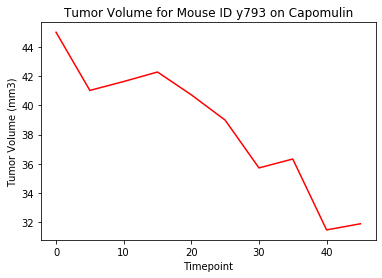

In [40]:
x_axis = np.arange(0, 50, 5)
y_axis = [45.00, 41.02, 41.63, 42.28, 40.72, 38.99, 35.72, 36.33, 31.48, 31.90]
y793 = plt.plot(x_axis, y_axis, color="red", label="Tumor Volume")
plt.title("Tumor Volume for Mouse ID y793 on Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [41]:
Capomulin_weight_df = last_combined_mice_merge2[last_combined_mice_merge2["Drug Regimen"] =="Capomulin"]
Capomulin_weight_df

,Timepoint,Tumor Volume (mm3),Drug Regimen,Weight (g)
Mouse ID,,,,
b128,45,38.982878,Capomulin,22
b742,45,38.939633,Capomulin,21
f966,20,30.485985,Capomulin,17
g288,45,37.074024,Capomulin,19
g316,45,40.159220,Capomulin,22
i557,45,47.685963,Capomulin,24
i738,45,37.311846,Capomulin,20
j119,45,38.125164,Capomulin,23
j246,35,38.753265,Capomulin,21


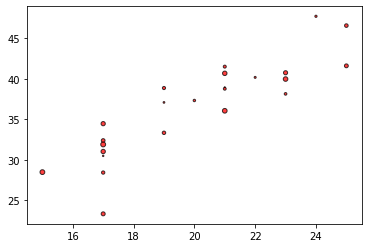

In [44]:
weight = Capomulin_weight_df["Weight (g)"]
tumor_vol = Capomulin_weight_df["Tumor Volume (mm3)"]
x_limit = 50
x_axis = np.arange(0, x_limit, 1)
data = [random.random() for value in x_axis]
plt.scatter(weight, tumor_vol, marker="o", facecolors="red", edgecolors="black",
             s=x_axis, alpha=0.75)
plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
